# BP神经网络
![](.\pic\bpmap.png)
上图为BP神经网络的经典网络图。BP神经网络是一种按误差逆传播算法训练的多层前馈网络，是目前应用最广泛的神经网络模型之一。BP网络能学习和存贮大量的输入-输出模式映射关系，而无需事前揭示描述这种映射关系的数学方程。BP神经网络模型拓扑结构包括输入层（input）、隐藏层(hide layer)和输出层(output layer)。

前馈网络就是前馈神经网，是最早方形的简单人工神经网络，在前馈神经网络中各个神经元分别属于不同的层，每层的神经元接收前一层神经元的信号，并产生信号输出给下一层。如上图所示。第0层为输入层，最后一层为输出层，中间为隐藏层。隐藏层和上一层的输入层的连接关系通常称为全连接，全连接的意思就是隐藏层的每个神经元和输入层的每个神经元都有链接。

隐藏节点做了什么事呢？如下图，做了两步，第一步对输入的值进行加权求和（即输入信号x乘以权重w，再累加），这个权重在机器学习中非常重要，整个机器学习的训练就是为了计算这个权重，通过不断的学习更新这个权重，以达到最后的输出和实际值无限接近，最后在增加一个偏置B。第二步就是使用一个函数把输出的值压缩到0-1之间（sigmod函数就是激活函数，输入的值可以理解为从负无穷到正无穷大之间的值）这个过程也叫做非线性变换。目前最常用的是ReLU激活函数。

![](.\pic\bpsub2.png)

为什么引入这种非线性变换，而不是线性变换。如下图，横坐标表示房子大小，纵坐标表示房子价格，左图的×表示某个房子大小所在的价格，左图的一条直线贯穿这些×，基本是拟合的，可以表示出随着房子增大价格是在增长的，通过未来的某个时间房子的大小预测出价格，这条线就是一个线性，也叫线性回归，回归就是用我们之前的数据去预测出一个未来的值（regression towards the mean,向着中间值回归。意思就是找一条线通过一堆点，让这条线尽可能在这堆点的中间）。但是我们也可以看出随着房子大小的减小，价格出现了负值，我们知道价格是不会是负值的，因此为了代替一条可能会让价格为负值的直线，我们把直线到纵坐标为0时，向左边弯曲，而不直线向下，这就让它最终在零结束，这个函数就可以完全拟合房屋的价格。如下图的右边图像。这就是ReLU激活函数。而房子的大小就相当于上面说的一个输入神经元比如x1。我们可以知道房子价格不仅仅与房子大小有关，还与它周围的环境比如是不是学区房？它是几室几厅的？等等，这些就是其他的输入神经元x2,x3等，这些因素综合起来影响着房屋的价格。这也就对应上前面的神经网络图了。

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="./pic/linear1.png"  width="400" height="460" ></div>
<div style="float:left;border:solid 1px 000;margin:2px;"><img src="./pic/linear2.png" width="400" height="460" ></div>

<div style="float:none;clear:both;">

</div>


按误差逆传播的意思就是通过正向计算得出最后的输出后（如第一张图的y1,y2就是最后的输出），从输出层开始反向计算每一层的每个单元的误差项，（输出与实际值做比较，得到一个误差值），如果误差值太大，就更新数据重新计算输出，直到误差不再下降或直到输出层的误差小于预设的容忍度为止。综上所述它的学习规则是使用梯度下降法，通过反向传播来不断调整网络的权值和阈值，使网络的误差平方和最小。


# MNIST手写体

MNIST数据集包含60,000个用于训练的示例和10,000个用于测试的示例。这些数字已经过尺寸标准化并位于图像中心，图像是固定大小(28x28像素)，其值为0到1。为简单起见，每个图像都被平展并转换为784(28 * 28)个特征的一维numpy数组。

![](.\pic\mnist.jpeg)

MNIST数据集包含一下4个文件。
* train-labels-idx1-ubyte.gz:训练集标记文件
* train-images-idx3-ubyte.gz:训练集图片文件
* t10k-labels-idx1-ubyte.gz:测试集标记文件
* t10k-images-idx3-ubyte.gz:测试集图片文件


In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# 载入数据 查看数据集的内容
digits = load_digits()
print(digits.images.shape)#显示数据集的形状，1797张图片，每个图片是8*8的图片，即64像素。

(1797, 8, 8)


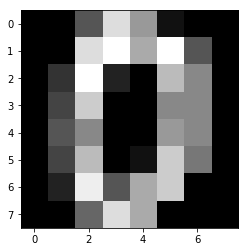

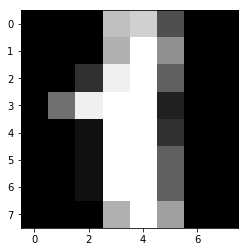

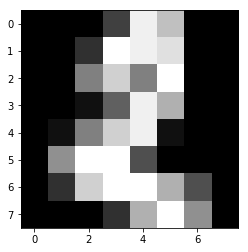

In [3]:
# 显示图片
plt.imshow(digits.images[0],cmap='gray')
plt.show()
plt.imshow(digits.images[1],cmap='gray')
plt.show()
plt.imshow(digits.images[2],cmap='gray')
plt.show()

In [8]:
# 查看数据内容
X = digits.data
# 查看标签
y = digits.target
print(X.shape)
print(y.shape)
print(X[:3])#看前三行的数据
print(y[:3])#看前三行标签，可以看出前三个样本是0,1,2

(1797, 64)
(1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]
[0 1 2]


In [9]:
# 定义一个神经网络，结构：64-100-10 表示输入是64个神经元（因为每个样本有64个数据如上打印的X.shape可以看出它的长度是64，中间隐藏层
#可以任意设置，一般会设置比输入层多，这里100，最后输出定义10个神经元，表示初始0-9的数字。
# 因为是三层所以会有两个权值矩阵，定义输入层到隐藏层之间的权值矩阵，大小的定义和网络结构有关，就是它左边有多少个和右边有多少个，输入层
#到隐藏层，左边输入层有64个行，右边隐藏层有100列个所以如下定义为(64,100),取值范围可以设置为-1到1之间，默认random是0到1，乘以2就是
#从0到2之间，再减去就为-1到1之间。
V = np.random.random((64,100))*2-1
# 定义隐藏层到输出层之间的权值矩阵，同上。
W = np.random.random((100,10))*2-1

print(V)
print(W)
# 数据切分
# 默认1/4为测试集，3/4为训练集，X_train训练集数据，X_test测试集数据，y_train训练集标签，y_test测试集标签
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 标签二值化即转化成one hot格式 需要为其每一个标签重新构造1*10的数组，其中下标为标签值的地方值为1，原因是为了与我们神经网络10的输出节点相对应
# 而且数字是0-9正好是10个数，每个数字对应与一个位置，对于分类问题通常都使用标签二值化处理，这样容易区分每个分类，比如标签是
# “yes”，“no”，“yes”处理后就变成1,0,1，更容易去区分。
# 0->1000000000
# 3->0001000000
# 9->0000000001
labels_train = LabelBinarizer().fit_transform(y_train)
print(y_train[:5])
print(labels_train[:5])

[[-0.86363455  0.75472695 -0.47418705 ...  0.28498997 -0.91418357
   0.82438333]
 [ 0.73591496  0.85396157 -0.16606819 ...  0.256474   -0.3874193
   0.61418037]
 [-0.81051746  0.20896592  0.2577596  ... -0.39261648  0.45731187
   0.98904883]
 ...
 [-0.33903062  0.73251625 -0.36873274 ...  0.82763529 -0.48534643
  -0.99886706]
 [ 0.50122246 -0.40300408 -0.83671298 ...  0.93051072 -0.32113572
   0.03476708]
 [ 0.51834879  0.15514284  0.90650464 ...  0.2616939  -0.95187344
   0.62284804]]
[[-5.25633370e-01  8.15827754e-01  1.08695715e-01 -1.35780703e-01
   9.20802226e-01 -8.61085035e-01  9.50004179e-01 -2.48232182e-01
  -9.61833598e-01 -5.02040350e-01]
 [ 4.56106581e-01  4.76264394e-01 -6.04053932e-01 -4.16258259e-01
   8.75204684e-01  2.71813214e-01  1.70214232e-01 -4.61207616e-01
   5.44864477e-01  1.27765341e-01]
 [ 5.18122811e-02 -1.11682631e-01 -3.22222624e-04 -6.35834564e-01
  -4.59732066e-01 -8.60160772e-01  5.66864075e-01  1.68350031e-01
  -8.59731949e-02  7.64447171e-01]
 [-4.720

# 激活函数

激活函数的用途（为什么需要激活函数）？

如果不用激活函数（其实相当于激活函数是y = x是线性的），在这种情况下你每一层神经元的输入都是上层输出的线性函数，很容易验证，无论你神经网络有多少层，输出都是输入的线性组合，与没有隐藏层效果相同。正因为这个的原因，我们决定引入非线性函数作为激活函数，这样深层神经网络表达能力就更加强。
有哪些激活函数，早期研究神经网络主要采用sigmoid函数或者tanh函数，但现在流行使用ReLU函数。就是上面说的那个激活函数。原因是sigmoid函数或者tanh函数在深度神经网络中梯度反向传递时导致梯度消失。如果神经网络隐层特别多时，梯度在穿过多层后将变得非常小接近于0，即出现梯度消失现象。

![...](.\pic\jihuo1.png)
![...](.\pic\relu.png)


# 激活函数导数

梯度是什么，前面我们已经讲了从前往后的正向传播就算一个输出，这个输出如果与实际值的误差较大，我们就要调整误差尽量让误差保持在一个能够接受的范围，也就是尽量让误差最小。最后就变成了在误差函数中找最小值，这就要用到梯度下降法。

如下图所示对于一个可导的函数，从任意一点出发，沿着导数下降的方向前进直到接近最低点就是导数为零时，就是函数的最小值，就是梯度下降法。通俗的讲就是如果你在山顶，想到山底（最小值），只需要每一步都往下走，不断地走肯定能走到最小值的地方。但是你需要更快地到达最小值，就需要找到每一步下坡最快的地方，即每一步都走某个方向，这个方向比其他方向离最小值更近。而下这个坡最快的方向就是梯度的负方向。

![](.\pic\td.png)

## 导数

![](.\pic\daoshu2.jpg)

设有曲线C及上的一点M，在点M外另取C上一点N，作割线.当点N沿曲线C趋于点M时，如果割线MN绕点N旋转而趋于极限位置MT,直线MT就称为曲线C在点M处的切线.这里极限位置的含义是：只要弦长MN趋于零.

现在就曲线C为函数y=f(x)的图形的情形来讨论切线问题.设$M(x_0,y_0)$是曲线C上的一个点，则$y_0=f(x_0)$.根据上述定义要定出曲线C在点M处的切线，只要定出切线的斜率就行了.为此，在点M外另取C上的一点N，于是割线的斜率为$tan(\phi)=\frac{y-y_0}{x-x_0}$

，

其中$\phi$为割线MN的倾角.当点N沿曲线C趋于点M时，$x \rightarrow x_0$.如果当$x \rightarrow x_0$时，上式的极限存在，设为k,即 

$\displaystyle k = \lim^{}_{x \to x_0}{\frac{f(x)-f(x_0)}{x-x_0}}$ 存在，则此极限是割线斜率的极限，也就是切线的斜率，这就是导数通常用dy/dx表示。也可以理解为一元函数的变化率。

* 斜率上倾，导数为正数
* 斜率下倾，导数为负数
* 斜率为水平直线，导数为零


## 偏导数

### x方向的偏导
设有二元函数 $z=f(x,y)$ ，点$(x_0,y_0)$是其定义域内的一点。把 固定在$y_0$而让x在$x_0$有增量 $\Delta x$ ，相应地函数 $z=f(x,y)$ 有增量（称为对 x 的偏增量）$\Delta z=f(x_0+\Delta x,y_0)-f(x_0,y_0)$。
如果 $\Delta z$ 与 $\Delta x$ 之比当 $\Delta x \rightarrow 0$ 时的极限存在，那么此极限值称为函数 $z=f(x,y)$ 在 $(x_0,y_0)$处对 x 的偏导数，记作 $f'_x(x_0,y_0)$或函数 $z=f(x,y)$ 在$(x_0,y_0)$处对 x 的偏导数，实际上就是把 y 固定在 $y_0$看成常数后，一元函数$z=f(x,y_0)$在 $x_0$处的导数或者$\frac{\partial z} {\partial x}$。

### y方向的偏导
同样，把 x 固定在 $x_0$，让 y 有增量 $\Delta y $，如果极限存在那么此极限称为函数 $z=(x,y)$ 在 $(x_0,y_0)$处对 y 的偏导数。记作$f'_y(x_0,y_0)$或者$\frac{\partial z} {\partial y}$。

所以偏导数是指多变量函数很对某个变量的变化率。常量的变化率为零。即常量求导和求偏导数是零。

## 方向导数

偏导数$\frac{\partial z} {\partial x}$和$\frac{\partial z} {\partial y}$只是函数沿相应的坐标轴x和y方向的变化率，方向导数就是函数在各个方向上的导数。


## 梯度

梯度是一个向量（指具有大小和方向的量，它可以形象化地表示为带箭头的线段），其方向上的方向导数最大，其大小正好是此最大方向导数。


## 向量

向量是一个有方向的线段，它的起点总是原点。向量的表示方式如下：

![](.\pic\vector1.png)

在2维空间中，向量 $\left[ \begin{matrix} i \\ j \end{matrix} \right]$第 1 个数字 i 是尖端落在 x 轴的长度，第 2 个数字 j 是尖端落在 y 轴的长度，如果落在原点的左边（x 轴）和下边（y 轴），则 i、j 的值为负数；在 3 维空间中，每个向量有 3 个数（i、j、k）来表示，分别是尖端落在 x、y、z 轴上的长度，x、y、z 同样是有符号的。如下图。

![](.\pic\vector2.png)

### 向量相加

向量 $\vec v （\left[\begin{matrix}2\\4\end{matrix}\right]）$和向量 $\vec w （\left[\begin{matrix}3\\1\end{matrix}\right]）$相加的示意图如下

![](.\pic\vector3.png)

*    保持 $\vec v$ 不动
*    保持 $\vec w$ 的方向不变，将 $\vec w$ 的末端平行移动到移动到 $\vec v$ 的尖端
*    从原点到$\vec w$ 尖端的向量即为 $\vec v$ 和 $\vec w$ 的和     

$\left[ \begin{matrix} 2 \\ 4 \end{matrix} \right] + \left[ \begin{matrix} 3 \\ 1 \end{matrix} \right] = \left[ \begin{matrix} 2 + 3 \\ 4 + 1 \end{matrix} \right]$

### 向量和常量乘法

用一个常量乘上一个向量，意味着将向量保持在其所在的直线上，对其长度进行拉伸、压缩和反向操作，例如 $2\vec v $是将向量$ \vec v $的长度拉升为原来的 2 倍，$\frac{1}{3} \vec v $是将$ \vec v $压缩为原来的$ \frac{1}{3}$，$-1.8 \vec v $是先对$ \vec v$ 进行反向，再将其长度拉伸为原来的 1.8 倍。
$\left[ \begin{matrix} 2\\ 4 \end{matrix} \right] \times 2 = \left[ \begin{matrix} 2 \times 2\\ 2 \times 4 \end{matrix} \right]$

![](.\pic\vector4.png)


## 矩阵

矩阵的本质其实是一种线性变换，线性方程式的简化表示方式，两者是一一对应关系。看如下所示。

$A= \left\{ \begin{array} \\2x +y=3\\ 3x+4y=7  \end{array} \right\}$

$\left[ \begin{matrix}  2 & 1 \\ 3 & 4  \end{matrix} \right] \left[ \begin{matrix} x \\ y  \end{matrix} \right] = \left[ \begin{matrix}  2x +y \\ 3x+4y  \end{matrix} \right] = \left[ \begin{matrix}  3 \\ 7  \end{matrix} \right]$

向量（列向量）$（\left[\begin{matrix}x\\y\end{matrix}\right]）$左侧就是2\*2的矩阵。它是$（\left[\begin{matrix}2\\3\end{matrix}\right]）$和$（\left[\begin{matrix}1\\4\end{matrix}\right]）$向量的组合，矩阵与向量的乘法运算法则也就如图所示。

![](.\pic\juzhen1.png)

通过上述可以理解如下两个矩阵的乘法规则：

![](.\pic\juzhen2.png)
![](.\pic\juzhen3.png)
![](.\pic\juzhen4.png)



In [7]:
# 激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 激活函数的导数
def dsigmoid(x):
    return x*(1-x)

BP算法如下图
![](.\pic\bp1.png)

上述公式只要了解一下就可以。

E代表损失函数，通过梯度下降法来最小化损失函数，所以就需要对损失函数的W权重求导。y=f(WX)是激活函数，算出预测值。t是标签。X是输入信号是已知的，W权重是需要调整的，用来减少误差，所以对它求导。当前使用的是二次损失函数。它的求导属于复合函数求导可以得出图中的式子，其中需要注意的就是W和X都是矩阵，所以f(WX)求导得出的是X的转置矩阵（行列交换的结果矩阵）。梯度下降法的公式就是负学习率$\eta$（0-1之间）乘以E的求导结果,把这个作为权重的变化，如上图最右侧的结果。

$ E' = 2 \times \frac{1}{2} \times (t-f(WX)) \times [t-f(WX)]'=(t-f(WX)) \times -f'(WX) \times (WX)' = - (X^T)\times(t-f(WX))\times f'(WX) $

$\delta = (t-f(WX))\times f'(WX)$


![矩阵求导](.\pic\vector5.png)

最下方的公式是BP算法的最后结论，直接使用即可。其中$\delta ^ L$里的参数都是已知的，可以直接计算出结果，用在$\delta ^ l$的计算公式里，根据公式可以看出只有先知道了最后一层结果才能推算前一层的结果，这就是一个反向求解的过程。最后结论的求解过程可以参考《人工神经网络理论设计与应用第2版》中“第3.2.2.2 BP算法推论”了解。实际可以直接使用结论即可。

In [31]:

# 训练模型X 是训练集数据，y是标签集，steps我们训练的次数，lr是learningrate学习率
def train(X,y,steps=10000,lr=0.11):
    global V,W
    for n in range(steps+1):
        # 随机选取一个数据
        i = np.random.randint(X.shape[0])
        # 获取一个数据
        x = X[i]
        x = np.atleast_2d(x)# 数据转成二维数组，矩阵乘法计算时需要用二维数组，原数据是一维数组
        # BP算法公式
        # 计算隐藏层的输出
        L1 = sigmoid(np.dot(x,V))#矩阵乘法x*V
        # 计算输出的输出
        L2 = sigmoid(np.dot(L1,W))
        # 计算L2_delta，L1_delta
        L2_delta = (y[i]-L2)*dsigmoid(L2)
        L1_delta = L2_delta.dot(W.T)*dsigmoid(L1)
        # 更新权值
        W += lr*L1.T.dot(L2_delta)
        V += lr*x.T.dot(L1_delta)
        
        # 每训练1000次预测一次准确率
        if n%1000==0:
            output = predict(X_test)#把测试集数据输入得到预测值
            predictions = np.argmax(output,axis=1)#数据是一个长度10的一维数组，最大值就是1,1所在的位置就是对应的数字。
            #求平均值，判断预测值和测试集的标签是不是相等，比如与测试是1，测试集是"[1,1,1,1,1,8,2,3,4,5]",那么equal返回
            #的是[true,true,true,true,true,false,false,false,false,false]再使用mean后就是0.5，即准确率是0.5
            acc = np.mean(np.equal(predictions,y_test))
            print('steps:',n,'accuracy:',acc)

def predict(x):
    # 计算隐藏层的输出
    L1 = sigmoid(np.dot(x,V))
    # 计算输出的输出
    L2 = sigmoid(np.dot(L1,W))
    return L2

In [32]:
train(X_train,labels_train,30000)

steps: 0 accuracy: 0.08444444444444445
steps: 1000 accuracy: 0.52
steps: 2000 accuracy: 0.64
steps: 3000 accuracy: 0.7222222222222222
steps: 4000 accuracy: 0.7955555555555556
steps: 5000 accuracy: 0.8266666666666667
steps: 6000 accuracy: 0.84
steps: 7000 accuracy: 0.8444444444444444
steps: 8000 accuracy: 0.8555555555555555
steps: 9000 accuracy: 0.8577777777777778
steps: 10000 accuracy: 0.9488888888888889
steps: 11000 accuracy: 0.94
steps: 12000 accuracy: 0.9444444444444444
steps: 13000 accuracy: 0.9622222222222222
steps: 14000 accuracy: 0.9755555555555555
steps: 15000 accuracy: 0.9511111111111111
steps: 16000 accuracy: 0.9688888888888889
steps: 17000 accuracy: 0.9711111111111111
steps: 18000 accuracy: 0.9688888888888889
steps: 19000 accuracy: 0.9755555555555555
steps: 20000 accuracy: 0.9688888888888889
steps: 21000 accuracy: 0.9622222222222222
steps: 22000 accuracy: 0.9666666666666667
steps: 23000 accuracy: 0.9688888888888889
steps: 24000 accuracy: 0.9755555555555555
steps: 25000 accur

In [34]:
output = predict(X_test)
predictions = np.argmax(output,axis=1)
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      0.94      0.97        48
          2       1.00      0.98      0.99        54
          3       0.95      0.98      0.97        43
          4       0.96      1.00      0.98        43
          5       1.00      0.98      0.99        48
          6       1.00      0.98      0.99        41
          7       1.00      0.98      0.99        53
          8       0.89      0.98      0.93        43
          9       1.00      1.00      1.00        34

avg / total       0.98      0.98      0.98       450

